# Chemical Potentials
1. In this notebook, we have arrived at a way to calculate partial derivatives of chemical potentials. This is done by first calculating the chemical potentials symbolically. After we arrive at a symbolic expression for the chemical potential, we then can substitute in numerical values. 

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym

pi = np.pi
Pi = sym.symbols('pi')

hc = 197.33 # MeV fm
n_sat = 0.16 # fm-3

## Declaring Classes
We declare a relativistic mean field EOS class, baryon, lepton, and meson classes. These store pertinent values for each thing. For example, each particle class stores the mass, fermi momentum, effective energy, etc for the particles.

We declare two types of classes: a numeric class that will store numerical values and a symbolic class that stores the symbols. From the latter we can arrive at a symbolic expression for the partial derivatives and stuff. Then, we can substitute in numerical values (in principle) to perform evaluations. 

### Equation of State with Coupling Constants
1. Allows for collection of coupling constants here. 
2. In the future could allow for generalization to other RMF-type models albiet at the moment, this would have to be the exact same model but with different coupling values

In [303]:
class eos:
    def __init__(self, g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c,\
                    g_sigma_LA, g_omega_LA, g_rho_LA, g_phi_LA):
        
        self.g_sigma_N = g_sigma_N
        self.g_omega_N = g_omega_N
        self.g_rho_N = g_rho_N
        self.g_phi_N = g_phi_N
        
        self.g_sigma_LA = g_sigma_LA
        self.g_omega_LA = g_omega_LA
        self.g_rho_LA = g_rho_LA
        self.g_phi_LA = g_phi_LA
        
        self.b = b
        self.c = c

In [304]:
# initializing numerical eos object 
gm3 = eos(g_sigma_N = 8.784820, g_omega_N = 8.720086, g_rho_N = 8.544795, g_phi_N = 0.0, b = 0.008628, c = -0.002433,\
             g_sigma_LA = 5.408849, g_omega_LA = 5.813391, g_rho_LA = 0.0, g_phi_LA = -4.110688)

# initializing symbolic eos object 
    # declaring symbols 
g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c = sym.symbols('g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c')
g_sigma_LA, g_omega_LA, g_rho_LA, g_phi_LA = sym.symbols('g_sigma_Lambda, g_omega_Lamda, g_rho_Lambda, g_phi_Lambda')

# initializing symbolic eos object
gm3_sym = eos(g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c,\
                    g_sigma_LA, g_omega_LA, g_rho_LA, g_phi_LA)

### Equation of State: Symbolic

In [305]:
# declaring symbols
g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c = sym.symbols('g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c')
g_sigma_LA, g_omega_LA, g_rho_LA, g_phi_LA = sym.symbols('g_sigma_Lambda, g_omega_Lamda, g_rho_Lambda, g_phi_Lambda')

In [306]:
# initializing symbolic eos
gm3_sym = eos(g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c,\
                g_sigma_LA, g_omega_LA, g_rho_LA, g_phi_LA)

### Sigma Field Self Interaction Term
$$
    U(\sigma) = \frac{1}{3}bm_N (g_\sigma \sigma)^3 + \frac{1}{4}c(g_\sigma \sigma)^4
$$

In [22]:
U = sym.Function('U')

### Baryons and Leptons
1. Declaring classes for baryons and leptons. Allows us to declare a baryon and lepton object that has the relevant data for each type of particle such as mass, charge, Fermi momentum, etc. 
2. The purpose of this is that we first arrive at an expression for the partial derivative of the chemical potentials symbolically. After that, we could then substitute in numerical values.

#### Declaring Numeric Classes

In [368]:
class baryon:
    def __init__(self, mass, isospin, charge, kind, var_type, mass_eff = 0.0, num_density = 0.0,\
                 frac = 0.0, kf = 0.0, ef = 0.0, chem_pot = 0.0):
    
        # variables to be established at baryon declaration
        self.mass = mass
        self.isospin = isospin
        self.charge = charge
        self.kind = kind
        self.var_type = var_type
    
        # variables to be stored later
        self.mass_eff = mass_eff
        self.num_density = num_density
        self.frac = frac
        self.kf = kf
        self.ef = ef
        self.chem_pot = chem_pot

class lepton:
    def __init__(self, mass, charge, num_density = 0.0, frac = 0.0, var_type = 0.0, kf = 0.0, chem_pot = 0.0):
        self.mass = mass
        self.charge = charge
        self.num_density = num_density
        self.frac = frac
        self.var_type = var_type
        self.kf = kf
        self.chem_pot = chem_pot

class independent_var:
    def __init__(self, var, func, tilde_chem_pot = 0.0, tilde_chem_pot_val = 0.0, num_val = 0.0, total_deriv = 0.0):
        self.var = var
        self.func = func
        
        self.tilde_chem_pot = tilde_chem_pot
        self.tilde_chem_pot_val = tilde_chem_pot_val
        
        self.num_val = num_val
        
        # total derivative of fraction wrt to nB
        self.total_deriv = total_deriv

In [369]:
# initializing independent variables
nb = independent_var(sym.symbols('n_B'), sym.Function('n_B'))
xe = independent_var(sym.symbols('x_e'), sym.Function('x_e'), sym.symbols('mu tilde_x_e'))
xl = independent_var(sym.symbols('x_Lambda'), sym.Function('x_Lambda'), sym.symbols('mu tilde_x_Lambda'))

In [309]:
# electron
electron_sym = lepton(sym.symbols('m_e'), -1, sym.symbols('n_e'), sym.symbols('x_e'), 'Independent',\
                      sym.symbols('k_F_e'), sym.symbols('\mu_e'))
electron_num = lepton(0.510, -1)

# lambda hyperon
lambda_sym = baryon(sym.symbols('m_Lambda'), 0.0, 0.0, 'Hyperon', 'Independent', sym.symbols('m_Lambda^*'),\
                    sym.symbols('n_Lambda'), sym.symbols('x_Lambda'), sym.symbols('k_F_Lambda'),\
                    sym.symbols('E^*_F_Lambda'), sym.symbols('mu_Lambda'))
lambda_num = baryon(1116.0, 0, 0, 'Hyperon', 'Independent')

# proton 
proton_sym = baryon(sym.symbols('m_p'), 1/2, 1, 'Nucleon', 'Dependent', sym.symbols('m_p^*'),\
                    sym.symbols('n_p'), sym.symbols('x_p'), sym.symbols('k_F_p'),\
                    sym.symbols('E^*_F_p'), sym.symbols('mu_p'))
proton_num = baryon(939.0, 1/2, 1, 'Nucleon', 'Dependent')

# neutron 
neutron_sym = baryon(sym.symbols('m_n'), -1/2, 0, 'Nucleon', 'Dependent', sym.symbols('m_n^*'),\
                    sym.symbols('n_n'), sym.symbols('x_n'), sym.symbols('k_F_n'),\
                    sym.symbols('E^*_F_n'), sym.symbols('mu_n'))
neutron_num = baryon(939.0, -1/2, 0, 'Nucleon', 'Dependent')

In [310]:
# re-write proton and neutron number densities and fractions in terms of independent ones
proton_sym.num_density = nb.var*(xe.var)
proton_sym.frac = xe.var

neutron_sym.num_density = nb.var*(1 - xe.var - xl.var)
neutron_sym.frac = 1 - xe.var - xl.var

### Mesons

In [311]:
class meson:
    def __init__(self, mass, field = 0.0):
        self.mass = mass # in MeV
        self.field = 0.0 

In [312]:
# declaring the symbolic meson objects
sigma_sym = meson(sym.symbols('m_sigma'), sym.symbols('sigma'))
omega_sym = meson(sym.symbols('m_omega'), sym.symbols('omega'))
rho_sym = meson(sym.symbols('m_rho'), sym.symbols('rho'))
phi_sym = meson(sym.symbols('m_phi'), sym.symbols('phi'))

# declaring the numeric meson objects
sigma_num = meson(550.0)
omega_num = meson(783.0)
rho_num = meson(770.0)
phi_num = meson(1020.0)

### Establishing Helpful Lists
1. Below we have two lists: a list of the independent variables and a list of the baryons. We sum over these in the code below.

In [370]:
# Making a list of the independent variables
independent_variables = [nb, xe, xl]

# List of symbolic and numeric baryon objects
baryon_list = [proton_sym, neutron_sym, lambda_sym]
baryon_num_list = [proton_num, neutron_num, lambda_num]

# List of symbolic and numeric lepton objects (just electrons for now)
lepton_list = [electron_sym]
lepton_num_list = [electron_num]

## Lepton/Electron Chemical Potential Derivative
$$
    \mu_e = \sqrt{k_{F_e}^2 + m_e^2} \qquad k_{F_e} = (3\pi^2 n_e)^{1/3} \qquad 
       n_e = n_B x_e
$$

In [242]:
def chem_pot_electron(x_j):
    # calculates derivative of electron chemical potential wrt variable x_j
    mu_e = sym.sqrt(electron_sym.kf**2 + electron_sym.mass**2)
    mu_e = mu_e.subs(electron_sym.kf, (3*Pi**2*sym.symbols('n_B')*electron_sym.frac)**(1/3))
    return mu_e.diff(x_j)

In [333]:
chem_pot_electron(nb.var)

0.480749856769136*(n_B*pi**2*x_e)**0.666666666666667/(n_B*sqrt(0.480749856769136*m_e**2 + (n_B*pi**2*x_e)**0.666666666666667))

# Working towards Baryon Chemical Potential Partial Derivatives
Ultimately, we want to write down a function that takes a baryon $i$ and an independent variable $x_j$ and returns the partial derivative of the chemical potential of baryon $i$ with respect to $x_j$. That is,
$$
    \frac{\partial \mu_i}{\partial x_j} = \frac{\partial \mu_i'}{\partial x_j} + \frac{\partial \mu_i^R}{\partial x_j}
$$
where 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    \qquad 
    \frac{\partial \mu_i^R}{\partial x_j} = \sum_k g_{\text{Meson}}\frac{\partial }{\partial x_j}\text{Meson}_j
$$
This task is broken down as follows:
- Calculate $\partial \mu_i'/\partial x_j$ and $\partial \mu_i^R/\partial x_j$
    - For the second task, we need to calculate partial derivatives of meson fields and then multiply by relevant coupling constants 
    - For the first task, then need to find the partial derivative of the effective energy. This then amounts to finding the partial derivative of the sigma fields. 
    
With this in mind, let us start from the bottom and work ourselves back up.

## Working Towards $\partial \mu^R_i/\partial x_j$

#### Calculating Partial Derivatives of Meson Fields with respect to independent variable $x_j$
1. Goal here: write a function that takes as input independent variable $x_j$ and returns $\partial \omega_0/\partial x_j$ and more.
2. At the moment, we have three functions. But in principle, they are all quite similar. Could try to generalize this by associating to each meson class object an 'Equation of state' function as well as their relevant coupling constants. Would allow us to condense these three equations into one single equation.

In [56]:
def partial_omega(x_j):
    # returns domega/dxj
    omega_sym.field = 0
    
    # equation of motion 
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            omega_sym.field = gm3_sym.g_omega_N*nb.var*baryon_list[i].frac + omega_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            omega_sym.field = gm3_sym.g_omega_LA*nb.var*baryon_list[i].frac + omega_sym.field
        
    omega_sym.field = 1/omega_sym.mass**2*omega_sym.field 

    # calculate partial derivative 
    return sym.simplify(omega_sym.field.diff(x_j))

In [60]:
def partial_rho(x_j):
    # returns drho/dxj
    rho_sym.field = 0 
    
    # equation of motion
    # in the future would be good to call the equation of motion directly here... from Lagrangian
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            rho_sym.field = gm3_sym.g_rho_N*baryon_list[i].frac*nb.var*baryon_list[i].isospin + rho_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            rho_sym.field = gm3_sym.g_rho_LA*baryon_list[i].frac*nb.var*baryon_list[i].isospin + rho_sym.field
    
    rho_sym.field = 1/rho_sym.mass**2*rho_sym.field
    
    # calculate partial derivative
    return sym.simplify(rho_sym.field.diff(x_j))

In [62]:
def partial_phi(x_j):
    # returns dmeson/dxj
    phi_sym.field = 0
    
    # equation of motion 
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            phi_sym.field = gm3_sym.g_phi_N*baryon_list[i].frac*nb.var + phi_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            phi_sym.field = gm3_sym.g_phi_LA*baryon_list[i].frac*nb.var + phi_sym.field
        
    phi_sym.field = 1/phi_sym.mass**2*phi_sym.field 
    
    # calculate partial derivative 
    return sym.simplify(phi_sym.field.diff(x_j))

### Arriving at expression for Partial Derivative of $\mu_i^R$
Where 
$$
    \mu_i^R = g_{\omega i}\omega + g_{\phi i}\phi + I_{3B}g_{\rho i}\rho
$$

In [63]:
def partial_mu_R(baryon_sym, x_j):
    # returns dmu_i^R/dx_j
    
    if(baryon_sym.kind == 'Nucleon'):
        return gm3_sym.g_omega_N*partial_omega(x_j) + gm3_sym.g_phi_N*partial_phi(x_j)\
            + baryon_sym.isospin*gm3_sym.g_rho_N*partial_rho(x_j)
    
    elif(baryon_sym.kind == 'Hyperon'):
        return gm3_sym.g_omega_LA*partial_omega(x_j) + gm3_sym.g_phi_LA*partial_omega(x_j)\
            + baryon_sym.isospin*gm3_sym.g_rho_LA*partial_rho(x_j)

## Working towards $\partial \mu_i'/\partial x_j$
We have the following expression for 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    = \frac{1}{2}\frac{k_{F_i}\dfrac{\partial k_{F_i}}{\partial x_j} - g_{\sigma i}m_i^* \dfrac{\partial\sigma}{\partial x_j}}{\sqrt{k_{F_i}^2 + {m_i^*}^2}}
$$
which depends on 
$$
    \frac{\partial k_{F_i}}{\partial x_j} \qquad \frac{\partial\sigma}{\partial x_j}
$$

#### Calculating $\frac{\partial k_{F_i}}{\partial x_j}$ with respect to independent variables

In [64]:
def partial_fermi(baryon_sym, x_j):
    # assumes baryon number density has already been re-written in terms of independent variables at the beginning
    kFi = (3*Pi**2*baryon_sym.num_density)**(sym.S(1)/3)
    return kFi.diff(x_j)

### Calculate $\partial \sigma/\partial x_j$
From the notes, we have
$$
    \frac{\partial \sigma}{\partial x_j} = \frac{\sum_i g_{\sigma i} \beta_i \dfrac{\partial k_{F_i}}{\partial x_j}}{m_\sigma^2 + \dfrac{\partial^2 U}{\partial \sigma^2} - \sum_i g_{\sigma i}\alpha_i}
$$
where
$$
    \alpha_i = \left[\frac{3}{2}\frac{g_{\sigma i}{m_i^*}^2}{\pi^2}
        \ln\frac{k_{F_i} + E_{F_i}}{m_i^*} -\frac{g_{\sigma i}}{\pi^2}\left(\frac{1}{2}k_{F_i}E_{F_i} + {m_i^*}^2\frac{k_{F_i}}{E_{F_i}}\right)\right]
$$
and
$$
    \beta_i = \frac{m_i^*}{\pi^2}\frac{k_{F_i}^2}{E_{F_i}}
$$

We have alpha given here but as we see, the code is a little ugly and redundant. We can improve this by using a sub class hopefully? Not esssential I guess.

In [65]:
def alpha(baryon_sym):
    if (baryon_sym.kind == 'Nucleon'):
        term1 = (3/2/Pi**2)*gm3_sym.g_sigma_N*baryon_sym.mass_eff**2*sym.log((baryon_sym.kf + baryon_sym.ef)/baryon_sym.mass_eff)
        term2 = (1/2)*baryon_sym.kf*baryon_sym.ef 
        term3 = baryon_sym.mass_eff**2*baryon_sym.kf/baryon_sym.ef
        return term1 - gm3_sym.g_sigma_N/Pi**2*(term2 + term3)
    elif (baryon_sym.kind == 'Hyperon'):
        term1 = (3/2/Pi**2)*gm3_sym.g_sigma_LA*baryon_sym.mass_eff**2*sym.log((baryon_sym.kf + baryon_sym.ef)/baryon_sym.mass_eff)
        term2 = (1/2)*baryon_sym.kf*baryon_sym.ef 
        term3 = baryon_sym.mass_eff**2*baryon_sym.kf/baryon_sym.ef
        return term1 - gm3_sym.g_sigma_LA/Pi**2*(term2 + term3)

def beta(baryon_sym):
    return baryon_sym.mass_eff*baryon_sym.kf**2/Pi**2/baryon_sym.ef

Now that we have our two ''unknowns'' we can plug back into the specified expression for partial sigma.

In [66]:
def partial_sigma(baryon, x_j):
    # returns dsigma/dx_j
    
    numerator = 0 
    denominator = sigma_sym.mass**2 + sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma'))
    for i in range(len(baryon_list)):
        if (baryon_list[i].kind == 'Nucleon'):
            numerator = numerator + gm3_sym.g_sigma_N*beta(baryon_list[i])*partial_fermi(baryon, x_j)
            denominator = denominator - gm3_sym.g_sigma_N*alpha(baryon_list[i])
        elif (baryon_list[i].kind == 'Hyperon'):
            numerator = numerator + gm3_sym.g_sigma_LA*beta(baryon_list[i])*partial_fermi(baryon, x_j)
            denominator = denominator - gm3_sym.g_sigma_LA*alpha(baryon_list[i])
    
    return numerator/denominator

### Arriving at expression for $\partial \mu'_i/\partial x_j$
With both $    \frac{\partial k_{F_i}}{\partial x_j}$ and $\frac{\partial\sigma}{\partial x_j}$ in hand, we have 
$\partial \mu'_i/\partial x_j$ via 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    = \frac{1}{2}\frac{k_{F_i}\dfrac{\partial k_{F_i}}{\partial x_j} - g_{\sigma i}m_i^* \dfrac{\partial\sigma}{\partial x_j}}{\sqrt{k_{F_i}^2 + {m_i^*}^2}}
$$

In [31]:
def partial_mu_prime(baryon, x_j):
    if (baryon.kind == 'Nucleon'):
        return sym.S(1)/2/sym.sqrt(baryon.kf**2 + baryon.mass_eff**2)*(baryon.kf*partial_fermi(baryon, x_j)\
                - gm3_sym.g_sigma_N*baryon.mass_eff*partial_sigma(baryon, x_j))
    elif (baryon.kind == 'Hyperon'):
        return sym.S(1)/2/sym.sqrt(baryon.kf**2 + baryon.mass_eff**2)*(baryon.kf*partial_fermi(baryon, x_j)\
                - gm3_sym.g_sigma_LA*baryon.mass_eff*partial_sigma(baryon, x_j))

## Adding $\partial \mu'_i/\partial x_j$ and $\partial \mu^R_i/\partial x_j$ together to get the Chemical Potential Partial Derivative: $\partial \mu_i/\partial x_j$
From $$
    \frac{\partial \mu_i}{\partial x_j} = \frac{\partial \mu_i'}{\partial x_j} + \frac{\partial \mu_i^R}{\partial x_j}
$$


In [32]:
def chem_pot_part_deriv(baryon, x_j):
    return partial_mu_prime(baryon, x_j) + partial_mu_R(baryon, x_j)

For visualization, we calculate the partial derivative of the proton chemical potential with respect to $x_e = x_p$. We see that it is not a fun expression. 

In [317]:
chem_pot_part_deriv(proton_sym, xe.var)

0.5*g_rho_N**2*n_B/m_rho**2 + (-g_sigma_N*m_p^**(3**(1/3)*g_sigma_N*k_F_p**2*m_p^**(n_B*pi**2*x_e)**(1/3)/(3*E^*_F_p*pi**2*x_e) + 3**(1/3)*g_sigma_N*k_F_n**2*m_n^**(n_B*pi**2*x_e)**(1/3)/(3*E^*_F_n*pi**2*x_e) + 3**(1/3)*g_sigma_Lambda*k_F_Lambda**2*m_Lambda^**(n_B*pi**2*x_e)**(1/3)/(3*E^*_F_Lambda*pi**2*x_e))/(-g_sigma_Lambda*(1.5*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - g_sigma_Lambda*(0.5*E^*_F_Lambda*k_F_Lambda + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - g_sigma_N*(0.5*E^*_F_n*k_F_n + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - g_sigma_N*(0.5*E^*_F_p*k_F_p + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2))) + 3**(1/3)*k_F_p*(n_B*pi**2*x_e)**(1/3)/(3*x_e))/(2*sqrt(k_F_p**2 + m_p^***2))

## Numerical Calculations
1. We have a symbolic expression for the chemical potential partial derivatives. In this part, we want to then get the numerical expressions. We substitute in for all variables the values of the fields, masses, coupling constants, fractions, etc. The plan here is to take the data from the data file and for each data row (ie, for a given nB and other fixed fractions and stuff) and store that in the numeric baryon class. Assuming that is done, we can then...

In [229]:
def electron_part_deriv_num(x_j):
    # substitute in numerical values and return numerical 
    # result for partial derivative given nB, xe values
    
    symbolic_part_deriv = chem_pot_electron(x_j)
    
    # replace all variables 
    symbolic_part_deriv = symbolic_part_deriv.subs([(Pi, np.pi), (electron_sym.mass, electron_num.mass),\
                                                   (electron_sym.frac, electron_num.frac), (nb.var, nb.num_val)])
    
    return sym.simplify(symbolic_part_deriv)

In [230]:
electron_part_deriv_num(nb.var)

0.351324263194836

In [209]:
def chem_pot_part_deriv_num(baryon, x_j):
    # substitute in numerical values and get a numerical 
    # result for partial derivative of baryon wrt to independent variable 
    
    symbolic_part_deriv = chem_pot_part_deriv(baryon, x_j)
    
    # replace Pi
    symbolic_part_deriv = symbolic_part_deriv.subs(Pi, np.pi)
    
    # replace baryon masses
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass, baryon_num_list[i].mass)

    # replace coupling constants
    symbolic_part_deriv = symbolic_part_deriv.subs([(gm3_sym.g_sigma_N, gm3.g_sigma_N),\
                                (gm3_sym.g_sigma_LA, gm3.g_sigma_LA), (gm3_sym.g_omega_N, gm3.g_omega_N),\
                                (gm3_sym.g_omega_LA, gm3.g_omega_LA), (gm3_sym.g_phi_N, gm3.g_phi_N),\
                                (gm3_sym.g_phi_LA, gm3.g_phi_LA), (gm3_sym.g_rho_N, gm3.g_rho_N),\
                                (gm3_sym.g_rho_LA, gm3.g_rho_LA)])

    # replace meson field masses
    symbolic_part_deriv = symbolic_part_deriv.subs([(omega_sym.mass, omega_num.mass), (sigma_sym.mass, sigma_num.mass),\
                                                   (phi_sym.mass, phi_num.mass), (rho_sym.mass, rho_num.mass)])


    for i in range(len(baryon_list)):
        if (baryon.kind == "Nucleon"):
            symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_N*sigma_num.field)
        elif (baryon.kind == "Hyperon"):
            symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_LA*sigma_num.field)

    # replace fermi momentum
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].kf, baryon_num_list[i].kf)
    
    
    # replace effective energy
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].ef, baryon_num_list[i].ef)
    

    # replace baryon number density
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].num_density, baryon_num_list[i].num_density)
    
    
    
    # replace particle fractions 
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].frac, baryon_num_list[i].frac)
    for i in range(len(lepton_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(lepton_list[i].frac, lepton_num_list[i].frac)
    
    # replace partial derivative of U self energy
    symbolic_part_deriv = symbolic_part_deriv.subs(sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma')),\
                                                  2*gm3.b*gm3.g_sigma_N**3*sigma_num.field + 3*gm3.c*gm3.g_sigma_N**4*sigma_num.field**2)
    
    symbolic_part_deriv = symbolic_part_deriv.subs(nb.var, nb.num_val)
    # evaluate 
    return symbolic_part_deriv

In [318]:
chem_pot_part_deriv_num(proton_sym, xe.var)

2.64764836267252e-5

### Tilde Chemical Potentials

In [236]:
def part_mu_x_e_tilde(x_j):
    return chem_pot_part_deriv_num(neutron_sym, x_j) - chem_pot_part_deriv_num(proton_sym, x_j)\
        - electron_part_deriv_num(x_j)

def part_mu_x_l_tilde(x_j):
    return chem_pot_part_deriv_num(neutron_sym, x_j) - chem_pot_part_deriv_num(lambda_sym, x_j)

In [268]:
part_mu_x_l_tilde(xl.var)

0

## Loading in Data
1. We read in the data.

In [84]:
data = pd.read_csv(r'/Users/vinhtran/Downloads/datafile_gm3.txt', sep=" ", header=0,\
                       names = ['nb/n0', 'P', 'E', 'Sigma', 'Rho','Omega', 'Phi', 'xn', 'xp',\
                            'xe', 'xL', 'fermi_n', 'fermi_p', 'fermi_e', 'fermi_L', 'nan'])
data

,nb/n0,P,E,Sigma,Rho,Omega,Phi,xn,xp,xe,xL,fermi_n,fermi_p,fermi_e,fermi_L,nan
0,0.28,0.070686,40.349774,8.198005,-2.328705,4.681230,-0.000000,0.990944,0.009056,0.009056,0.000000,212.949950,44.522679,44.522679,0.000000,NaN
1,0.29,0.080052,41.793525,8.453906,-2.409592,4.848417,-0.000000,0.990479,0.009521,0.009521,0.000000,215.421820,45.803502,45.803502,0.000000,NaN
2,0.30,0.090248,43.237612,8.707875,-2.490287,5.015604,-0.000000,0.990008,0.009992,0.009992,0.000000,217.835457,47.075844,47.075844,0.000000,NaN
3,0.31,0.101300,44.682054,8.959955,-2.570788,5.182791,-0.000000,0.989530,0.010470,0.010470,0.000000,220.194014,48.339953,48.339953,0.000000,NaN
4,0.32,0.113235,46.126866,9.210186,-2.651092,5.349977,-0.000000,0.989046,0.010954,0.010954,0.000000,222.500376,49.596057,49.596057,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,7.96,424.462572,1518.141189,76.157712,-19.387450,110.614440,-18.722709,0.390550,0.103000,0.103000,0.506450,476.509635,305.580406,305.580406,519.627154,NaN
769,7.97,425.578051,1520.582346,76.195184,-19.389709,110.732982,-18.763248,0.390156,0.102934,0.102934,0.506910,476.548918,305.642795,305.642795,520.001921,NaN
770,7.98,426.695085,1523.024904,76.232608,-19.391960,110.851508,-18.803800,0.389763,0.102868,0.102868,0.507369,476.588102,305.705038,305.705038,520.376269,NaN
771,7.99,427.813675,1525.468863,76.269983,-19.394204,110.970019,-18.844365,0.389371,0.102802,0.102802,0.507827,476.627187,305.767137,305.767137,520.750198,NaN


In [132]:
nb_array = data.loc[:,'nb/n0'].values
P_array = data.loc[:,'P'].values
E_array = data.loc[:,'E'].values
sigma_array = data.loc[:,'Sigma'].values
rho_array = data.loc[:,'Rho'].values
omega_array = data.loc[:,'Omega'].values
phi_array = data.loc[:,'Phi'].values

neutron_frac = data.loc[:, 'xn'].values
proton_frac = data.loc[:, 'xp'].values
electron_frac = data.loc[:, 'xe'].values
lambda_frac = data.loc[:, 'xL'].values

fermi_n = data.loc[:, 'fermi_n'].values
fermi_p = data.loc[:, 'fermi_p'].values
fermi_e = data.loc[:, 'fermi_e'].values
fermi_L = data.loc[:, 'fermi_L'].values

In [403]:
def load_values(i):
    # load in values to numerical baryon object from data table 
    # this is done in anticipation of numerical calculation of partial derivatives
    
    #for i in range(len(nb_array)):
        nb.num_val = nb_array[i]
        # allocate values 
        sigma_num.field = sigma_array[i]
        rho_num.field = rho_array[i]
        omega_num.field = omega_array[i]
        phi_num.field = phi_array[i]
        
        neutron_num.frac = neutron_frac[i]
        proton_num.frac = proton_frac[i]
        electron_num.frac = electron_frac[i]
        lambda_num.frac = lambda_frac[i]
        
        neutron_num.kf = fermi_n[i]
        proton_num.kf = fermi_p[i]
        electron_num.kf = fermi_e[i]
        lambda_num.kf = fermi_L[i]
        
        # need to fill in eff values!!
        neutron_num.ef = np.sqrt(neutron_num.kf**2 + (neutron_num.mass - gm3.g_omega_N*sigma_num.field)**2)
        proton_num.ef = np.sqrt(neutron_num.kf**2 + (proton_num.mass - gm3.g_omega_N*sigma_num.field)**2)
        lambda_num.ef = np.sqrt(neutron_num.kf**2 + (lambda_num.mass - gm3.g_omega_LA*sigma_num.field)**2)
        
        # calculate partial derivative
        #return chem_pot_part_deriv_num(proton_sym, xe.var)
        
        # fill in chemical potential values I guess
        baryon_chemical_potential(neutron_num)

In [404]:
load_values(400)

## System of Equations
We have two equations here:
$$
    \frac{\partial \tilde{\mu}_{x_e}}{\partial n_B} = -\sum_j \frac{\partial \tilde{\mu}_{x_e}}{\partial x_j}\frac{dx_j}{dn_B} \qquad j \in \text{ind. vars.}
$$
and
$$
    \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial n_B} = -\sum_j \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_j}\frac{dx_j}{dn_B} \qquad j \in \text{ind. vars.}
$$
And our goal is to solve for $dx_j/dn_B$.

In [255]:
total_deriv_ind_var = [sym.diff(xe.func(nb.var), nb.var), sym.diff(xl.func(nb.var), nb.var)]

In [383]:
def expression_xe(independent_variables, total_deriv_ind_var):
    expression = 0.0 
    for i in range(len(independent_variables)-1):
        expression = part_mu_x_e_tilde(independent_variables[i+1].var)*total_deriv_ind_var[i] + expression
        #print(expression)
    return part_mu_x_e_tilde(nb.var) + expression 

def expression_xl(independent_variables, total_deriv_ind_var):
    expression = 0.0 
    for i in range(len(independent_variables)-1):
        expression = part_mu_x_l_tilde(independent_variables[i+1].var)*total_deriv_ind_var[i] + expression
    return part_mu_x_l_tilde(nb.var) + expression 

In [493]:
def numerical_total_deriv(independent_variables, total_deriv_ind_var):
    # return numerical values for total derivatives of ind. vars with respect to nB
    
    eqn1 = expression_xe(independent_variables, total_deriv_ind_var)
    eqn2 = expression_xl(independent_variables, total_deriv_ind_var)

    #expr = sym.linsolve([eqn1, eqn2], (total_deriv_ind_var))
    expr = sym.solve([eqn1, eqn2], (total_deriv_ind_var), dict = 'True')
    
    independent_variables[1].total_deriv = expr[0][total_deriv_ind_var[0]]
    independent_variables[2].total_deriv = expr[0][total_deriv_ind_var[1]]

In [494]:
load_values(100)
#numerical_total_deriv(independent_variables, total_deriv_ind_var)

In [495]:
numerical_total_deriv(independent_variables, total_deriv_ind_var)

## Sound Speed Difference

$$
    c_s^2 - c_e^2 = - \frac{n_B^2}{\mu_n}
    \sum_j \frac{\partial \tilde{\mu}_{x_j}}{\partial n_B}\frac{dx_j}{dn_B} \qquad j \in \text{ind. var minus $n_B$}
$$

In [342]:
def baryon_chemical_potential(baryon):
    if (baryon.kind == 'Nucleon'):
        baryon.chem_pot = np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_N*omega_num.field\
                    + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
        #return np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_N*omega_num.field\
        #            + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
    elif (baryon.kind == 'Hyperon'):
        baryon.chem_pot = np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_N*omega_num.field\
                    + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
        #return np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_LA*omega_num.field\
        #            + gm3.g_phi_LA*phi_num.field + baryon.isospin*gm3.g_rho_LA*rho_num.field

In [441]:
def sound_speed_diff_test():
    expression = 0.0
    expression = part_mu_x_e_tilde(nb.var)*xe.total_deriv + part_mu_x_l_tilde(nb.var)*xl.total_deriv
    return -nb.num_val**2/neutron_num.chem_pot*expression 

# Consolidating Everything Together

In [412]:
def sound_speed_diff(integer):
    load_values(integer)
    numerical_total_deriv(independent_variables, total_deriv_ind_var)
    return sound_speed_diff_test()

In [425]:
sound_speed_diff(600)

-6.53464291470750e-5

In [420]:
x = np.zeros(8)
y = np.zeros(8)

#for i in range(7):
#    x[i] = nb_array[i*100]
#    y[i] = sound_speed_diff(i*100)

In [502]:
x[0] = nb_array[10]
x[1] = nb_array[50]
x[2] = nb_array[100]
x[3] = nb_array[150]
x[4] = nb_array[200]
x[5] = nb_array[250]
x[6] = nb_array[300]
x[7] = nb_array[350]

In [503]:
array = [10, 50, 100, 150, 200, 250, 300, 350]

In [504]:
for i in array:
    counter = 0
    y[counter] = sound_speed_diff(i)
    counter = counter + 1

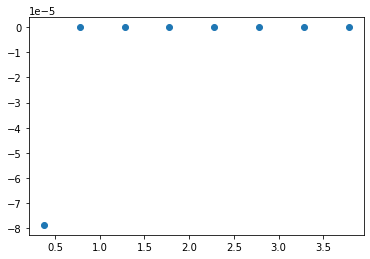

In [505]:
plt.scatter(x,y)

In [506]:
x

array([0.38, 0.78, 1.28, 1.78, 2.28, 2.78, 3.28, 3.78])

## Future Considerations
1. Take what we've done here and write these functions as library functions... Would be amazing if could just call a function that immediately calculates the partial derivatives.